In [ ]:
# Setting up the work for data-driven inference based on CitiBike data
# developed by Eve Marenghi for PUI in 2018

In [1]:
# Import the necessary packages
from __future__  import print_function, division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime as dt

%matplotlib inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

Must set env variable PUI2018


## IDEA: 
## People in their 30s are less likely than people in their 20s to use CitiBike for commuting

## NULL HYPOTHESIS: 
## The proportion of people in their 20s biking on weekends is _the same or higher_ than the proportion of people in their 30s biking on weekends 

# $H_0$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} <= \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}}$
# $H_1$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} > \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}}$

or identically:

# $H_0$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} - \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}} <= 0 $
# $H_1$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} - \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}} > 0$

## I will use a significance level $\alpha=0.05$

### This means that I want the probability of getting a result to be at least as significant as mine to be less than 5%. 

## I am starting by reading data from CitiBike csv file from June 2015 

In [ ]:
!curl https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip?accessType=DOWNLOAD > 201506-citibike-tripdata.zip

In [43]:
# Make sure an environmental variable for PUIdata exists
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/em3932/PUIdata


In [38]:
!mv 201506-citibike-tripdata.zip $PUIDATA

In [28]:
# Read the CitiBike data into a pandas dataframe (June 2015)
cb_df = pd.read_csv(os.getenv("PUIDATA") + '/201506-citibike-tripdata.zip')

# Convert starttime to a datetime object 
cb_df['date'] = cb_df['starttime'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))

# Look at the top of the June dataframe
cb_df.head()

tripduration      starttime       stoptime  start station id  \
0          1338  6/1/2015 0:00  6/1/2015 0:22               128   
1           290  6/1/2015 0:00  6/1/2015 0:05               438   
2           634  6/1/2015 0:01  6/1/2015 0:11               383   
3           159  6/1/2015 0:01  6/1/2015 0:04               361   
4          1233  6/1/2015 0:02  6/1/2015 0:22               382   

           start station name  start station latitude  \
0    MacDougal St & Prince St               40.727103   
1         St Marks Pl & 1 Ave               40.727791   
2  Greenwich Ave & Charles St               40.735238   
3        Allen St & Hester St               40.716059   
4     University Pl & E 14 St               40.734927   

   start station longitude  end station id         end station name  \
0               -74.002971            2021          W 45 St & 8 Ave   
1               -73.985649             312  Allen St & E Houston St   
2               -74.000271             388         W 26 St & 10 Ave   
3               -73.991908             531   Forsyth St & Broome St   
4               -73.992005             532          S 5 Pl & S 4 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.759291             -73.988597   20721  Subscriber   
1             40.722055             -73.989111   21606  Subscriber   
2             40.749718             -74.002950   16595  Subscriber   
3             40.718939             -73.992663   16949  Subscriber   
4             40.710451             -73.960876   17028    Customer   

   birth year  gender                date  
0      1984.0       1 2015-06-01 00:00:00  
1      1997.0       1 2015-06-01 00:00:00  
2      1993.0       1 2015-06-01 00:01:00  
3      1981.0       1 2015-06-01 00:01:00  
4         NaN       0 2015-06-01 00:02:00

In [24]:
# Read the CitiBike data into a pandas dataframe (Dec 2015)
# added a cold month to correct for seasonality 
cb_df2 = pd.read_csv(os.getenv("PUIDATA") + '/201512-citibike-tripdata.csv')

# Convert starttime to a datetime object 
cb_df2['date'] = cb_df2['starttime'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

# Look at the top of the Dec dataframe
cb_df2.head()

tripduration           starttime            stoptime  start station id  \
0           475  12/1/2015 07:35:36  12/1/2015 07:43:32                72   
1           684  12/1/2015 07:38:15  12/1/2015 07:49:39                72   
2          1063  12/1/2015 07:44:49  12/1/2015 08:02:33                72   
3          1075  12/1/2015 08:02:29  12/1/2015 08:20:24                72   
4           293  12/1/2015 08:06:37  12/1/2015 08:11:30                72   

  start station name  start station latitude  start station longitude  \
0   W 52 St & 11 Ave               40.767272               -73.993929   
1   W 52 St & 11 Ave               40.767272               -73.993929   
2   W 52 St & 11 Ave               40.767272               -73.993929   
3   W 52 St & 11 Ave               40.767272               -73.993929   
4   W 52 St & 11 Ave               40.767272               -73.993929   

   end station id               end station name  end station latitude  \
0             173             Broadway & W 49 St             40.760647   
1             520                W 52 St & 5 Ave             40.759923   
2             358  Christopher St & Greenwich St             40.732916   
3             505                6 Ave & W 33 St             40.749013   
4             525               W 34 St & 11 Ave             40.755942   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.984427   22780  Subscriber      1983.0       1   
1             -73.976485   17787  Subscriber      1975.0       1   
2             -74.007114   18797  Subscriber      1966.0       1   
3             -73.988484   14625  Subscriber      1985.0       1   
4             -74.002116   21238  Subscriber      1968.0       1   

                 date  
0 2015-12-01 07:35:36  
1 2015-12-01 07:38:15  
2 2015-12-01 07:44:49  
3 2015-12-01 08:02:29  
4 2015-12-01 08:06:37

In [32]:
cb_df = pd.concat([cb_df, cb_df2])
cb_df.head()

tripduration      starttime       stoptime  start station id  \
0          1338  6/1/2015 0:00  6/1/2015 0:22               128   
1           290  6/1/2015 0:00  6/1/2015 0:05               438   
2           634  6/1/2015 0:01  6/1/2015 0:11               383   
3           159  6/1/2015 0:01  6/1/2015 0:04               361   
4          1233  6/1/2015 0:02  6/1/2015 0:22               382   

           start station name  start station latitude  \
0    MacDougal St & Prince St               40.727103   
1         St Marks Pl & 1 Ave               40.727791   
2  Greenwich Ave & Charles St               40.735238   
3        Allen St & Hester St               40.716059   
4     University Pl & E 14 St               40.734927   

   start station longitude  end station id         end station name  \
0               -74.002971            2021          W 45 St & 8 Ave   
1               -73.985649             312  Allen St & E Houston St   
2               -74.000271             388         W 26 St & 10 Ave   
3               -73.991908             531   Forsyth St & Broome St   
4               -73.992005             532          S 5 Pl & S 4 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.759291             -73.988597   20721  Subscriber   
1             40.722055             -73.989111   21606  Subscriber   
2             40.749718             -74.002950   16595  Subscriber   
3             40.718939             -73.992663   16949  Subscriber   
4             40.710451             -73.960876   17028    Customer   

   birth year  gender                date  
0      1984.0       1 2015-06-01 00:00:00  
1      1997.0       1 2015-06-01 00:00:00  
2      1993.0       1 2015-06-01 00:01:00  
3      1981.0       1 2015-06-01 00:01:00  
4         NaN       0 2015-06-01 00:02:00

In [33]:
# count nulls
cb_df.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 198269
gender                          0
date                            0
dtype: int64

In [34]:
# Get the column names
cb_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [35]:
# Drop the columns we don't need
cb_df.drop(['tripduration', 'starttime','stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'gender'], axis=1, inplace=True)

In [36]:
# Look at the top of the reduced dataframe
cb_df.head()

birth year                date
0      1984.0 2015-06-01 00:00:00
1      1997.0 2015-06-01 00:00:00
2      1993.0 2015-06-01 00:01:00
3      1981.0 2015-06-01 00:01:00
4         NaN 2015-06-01 00:02:00

In [37]:
# Look at the bottom of the reduced dataframe
cb_df.tail()

birth year                date
804120      1957.0 2015-12-31 16:50:17
804121      1978.0 2015-12-31 17:17:52
804122      1959.0 2015-12-31 17:56:22
804123      1987.0 2015-12-31 21:20:38
804124      1968.0 2015-12-31 21:49:19

In [38]:
# Find out how many rows are in the table
len(cb_df)

1745344

In [39]:
# Remove NaN rows
cb_df = cb_df.dropna()

# Get the num rows again
len(cb_df)

1547075

In [40]:
# Only keep ride for people in their 20s and 30s
cb_df = cb_df.drop(cb_df[(cb_df['birth year'] < 1979)].index)
cb_df = cb_df.drop(cb_df[(cb_df['birth year'] > 1998)].index)

In [41]:
# Find min and max birth years 
print(min(cb_df['birth year']))
print(max(cb_df['birth year']))

1979.0
1998.0


In [42]:
cb_df_30s = cb_df['date'][cb_df['birth year'] < 1989]
cb_df_20s = cb_df['date'][cb_df['birth year'] > 1988]

In [43]:
len(cb_df_30s)

332354

In [44]:
len(cb_df_20s)
# There are nearly 3x as many riders in their 30s as in their 20s

126434

In [45]:
type(cb_df['birth year'])

pandas.core.series.Series

In [46]:
# Add a 'decades' column to identify people in their 20s vs. 30s using mapping
birth_year_to_decade = {
  1979.0: '30s',
  1980.0: '30s',
  1981.0: '30s',
  1982.0: '30s',
  1983.0: '30s',
  1984.0: '30s',
  1985.0: '30s',
  1986.0: '30s',
  1987.0: '30s',
  1988.0: '30s',
    1989.0: '20s',
    1990.0: '20s',
    1991.0: '20s',
    1992.0: '20s',
    1993.0: '20s',
    1994.0: '20s',
    1995.0: '20s',
    1996.0: '20s',
    1997.0: '20s',
    1998.0: '20s',
}


In [47]:
# Add a 'decades' column to identify people in their 20s vs. 30s using mapping
cb_df['decade'] = cb_df['birth year'].map(birth_year_to_decade)
cb_df

birth year                date decade
0           1984.0 2015-06-01 00:00:00    30s
3           1981.0 2015-06-01 00:01:00    30s
12          1985.0 2015-06-01 00:10:00    30s
13          1989.0 2015-06-01 00:11:00    20s
14          1983.0 2015-06-01 00:13:00    30s
16          1985.0 2015-06-01 00:13:00    30s
19          1984.0 2015-06-01 00:14:00    30s
21          1993.0 2015-06-01 00:15:00    20s
22          1990.0 2015-06-01 00:16:00    20s
24          1986.0 2015-06-01 00:22:00    30s
27          1983.0 2015-06-01 00:24:00    30s
41          1989.0 2015-06-01 00:31:00    20s
44          1986.0 2015-06-01 00:33:00    30s
48          1993.0 2015-06-01 00:35:00    20s
49          1992.0 2015-06-01 00:36:00    20s
52          1986.0 2015-06-01 00:37:00    30s
58          1985.0 2015-06-01 00:42:00    30s
60          1985.0 2015-06-01 00:45:00    30s
67          1986.0 2015-06-01 00:50:00    30s
70          1979.0 2015-06-01 00:51:00    30s
73          1984.0 2015-06-01 00:54:00    30s
76          1983.0 2015-06-01 00:55:00    30s
85          1987.0 2015-06-01 01:04:00    30s
87          1988.0 2015-06-01 01:05:00    30s
88          1995.0 2015-06-01 01:07:00    20s
98          1984.0 2015-06-01 01:13:00    30s
101         1995.0 2015-06-01 01:14:00    20s
105         1993.0 2015-06-01 01:23:00    20s
118         1984.0 2015-06-01 01:36:00    30s
120         1986.0 2015-06-01 01:40:00    30s
...            ...                 ...    ...
804032      1982.0 2015-12-27 10:06:42    30s
804033      1984.0 2015-12-27 11:18:48    30s
804034      1989.0 2015-12-27 15:57:38    20s
804038      1985.0 2015-12-27 21:55:27    30s
804042      1980.0 2015-12-28 09:05:24    30s
804043      1984.0 2015-12-28 09:26:07    30s
804045      1981.0 2015-12-28 13:49:08    30s
804046      1985.0 2015-12-28 16:20:13    30s
804048      1982.0 2015-12-28 21:51:59    30s
804052      1985.0 2015-12-29 09:40:18    30s
804055      1982.0 2015-12-29 13:36:08    30s
804057      1989.0 2015-12-29 15:12:31    20s
804058      1982.0 2015-12-29 21:50:23    30s
804061      1987.0 2015-12-30 07:24:38    30s
804065      1980.0 2015-12-30 09:18:27    30s
804068      1987.0 2015-12-30 10:44:39    30s
804074      1988.0 2015-12-30 17:30:22    30s
804075      1985.0 2015-12-30 18:05:38    30s
804076      1982.0 2015-12-30 19:03:08    30s
804080      1982.0 2015-12-31 07:53:52    30s
804082      1984.0 2015-12-31 09:37:20    30s
804083      1985.0 2015-12-31 10:05:03    30s
804088      1990.0 2015-12-31 15:02:58    20s
804094      1982.0 2015-12-31 18:48:19    30s
804101      1986.0 2015-12-28 20:08:29    30s
804104      1979.0 2015-12-30 09:05:03    30s
804105      1986.0 2015-12-30 12:30:16    30s
804106      1982.0 2015-12-30 21:10:34    30s
804107      1988.0 2015-12-31 08:09:56    30s
804116      1982.0 2015-12-31 13:44:49    30s

[458788 rows x 3 columns]

## Separate people in their 20s and 30s to test the hypothesis

## Plot the number of trips per day of week

In [60]:
# reset index 
cb_df = cb_df.reset_index()
cb_df = cb_df_temp[['birth year', 'date', 'decade']]
cb_df.head()

birth year                date decade
0      1984.0 2015-06-01 00:00:00    30s
1      1981.0 2015-06-01 00:01:00    30s
2      1985.0 2015-06-01 00:10:00    30s
3      1989.0 2015-06-01 00:11:00    20s
4      1983.0 2015-06-01 00:13:00    30s

In [171]:

fig = pl.figure(figsize(15,15))


ax = (cb_df['date'][cb_df['birth year'] < 1989].groupby([cb_df['date'].dt.weekday]).count()).plot(kind="bar",
                                                                                          color='skyblue', 
                                                                                         label='30s')
# (df['date'][(df['tripduration'] > 600) & (df['tripduration'] <= 900)].groupby([df['date'].dt.weekday]).count()).plot(kind="bar", 
                                                                                              
#                                                                                               color='IndianRed',
                                                                                        
#                                                                                               label='10-15minsTrip')

# (df['date'][(df['tripduration'] > 900) & (df['tripduration'] <= 1800)].groupby([df['date'].dt.weekday]).count()).plot(kind="bar", 
                                                                                              
#                                                                                               color='Turquoise',
                                                                                              
#                                                                                               label='15-30minsTrip')

ax =(cb_df['date'][cb_df['birth year'] > 1988].groupby([cb_df['date'].dt.weekday]).plot(kind="bar",
                                                                                          color='Orchid', 
                                                                                        alpha=0.5, 
                                                                                         label='20s')



tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_title ("Number of CitiBike Rides vs. Day of Week for June and December 2015", fontsize=20)
ax.set_ylabel ("Number of Rides", fontsize=20)
ax.set_xlabel ("Day of Week", fontsize=20)
plt.legend()

SyntaxError: invalid syntax (<ipython-input-171-e0bff538d75c>, line 27)

In [ ]:
# Plot the number of trips per week day
fig = plt.figure(figsize = (15,10))

# Use the plot method in pandas
norm_w = 1
((cb_df['date'][cb_df['birth year'] < 1989].groupby([cb_df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='steelblue', 
                                                                                         label='30s')

norm_m = 1
ax = ((cb_df['date'][cb_df['birth year'] > 1988].groupby([cb_df['date'].dt.weekday]).count()) / norm_m).plot(kind="indianred", 
                                                                                              color='black', 
                                                                                              alpha=0.5,
                                                                                              label='20s')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_title ("Number of CitiBike Rides vs. Day of Week for June and December 2015", fontsize=20)
ax.set_ylabel ("Number of Rides", fontsize=20)
ax.set_xlabel ("Day of Week", fontsize=20)
plt.legend()

## Figure 1a: Distribution of CitiBike rider ages (20s or 30s) for June and December 2015, absolute counts. We can see from the chart that in total, there are more CitiBike riders in their 30s than in their 20s. We also see that there are lower total rides on Saturdays and Sundays compared to weekdays.

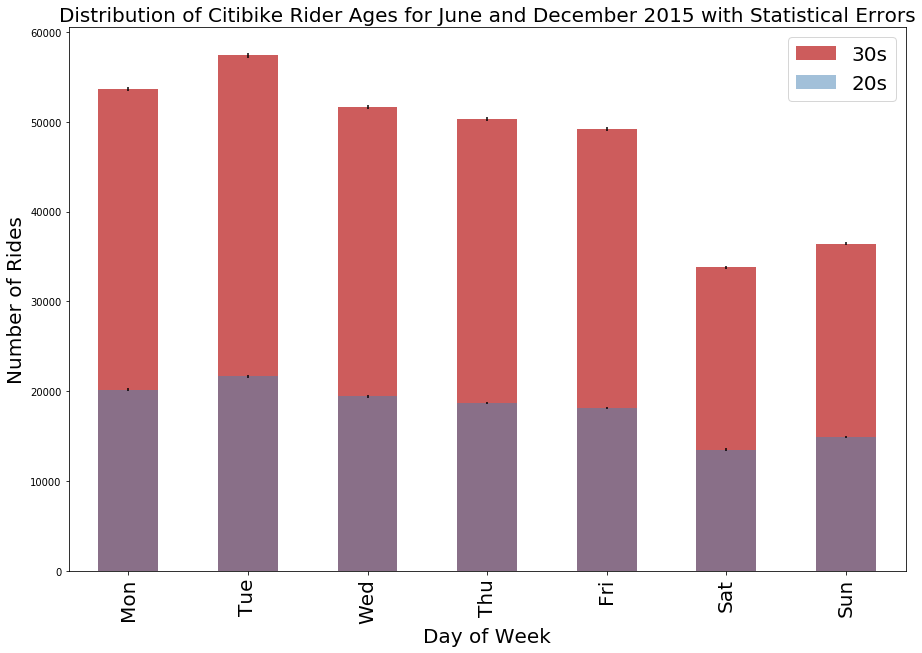

In [137]:
# Note: the counts have errors of course. what is the error on the count statistics?
# for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

fig = plt.figure(figsize = (15,10))

counts_w = cb_df.date[cb_df['birth year'] < 1989].groupby([cb_df.date.dt.weekday]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='30s')


counts_m = cb_df.date[cb_df['birth year'] > 1988].groupby([cb_df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='20s')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_title ("Distribution of Citibike Rider Ages for June and December 2015 with Statistical Errors", fontsize=20)
ax.set_ylabel ("Number of Rides", fontsize=20)
ax.set_xlabel ("Day of Week", fontsize=20)
plt.legend(['30s','20s'],fontsize=20)

## Figure 1b: Distribution of Citibike rider ages (20s or 30s) in June 2015, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's normalize the distribution of man, and that of women, i.e. devide them by the total number of rides for that gender. (Notice that we have to normalize the errorbars too!)

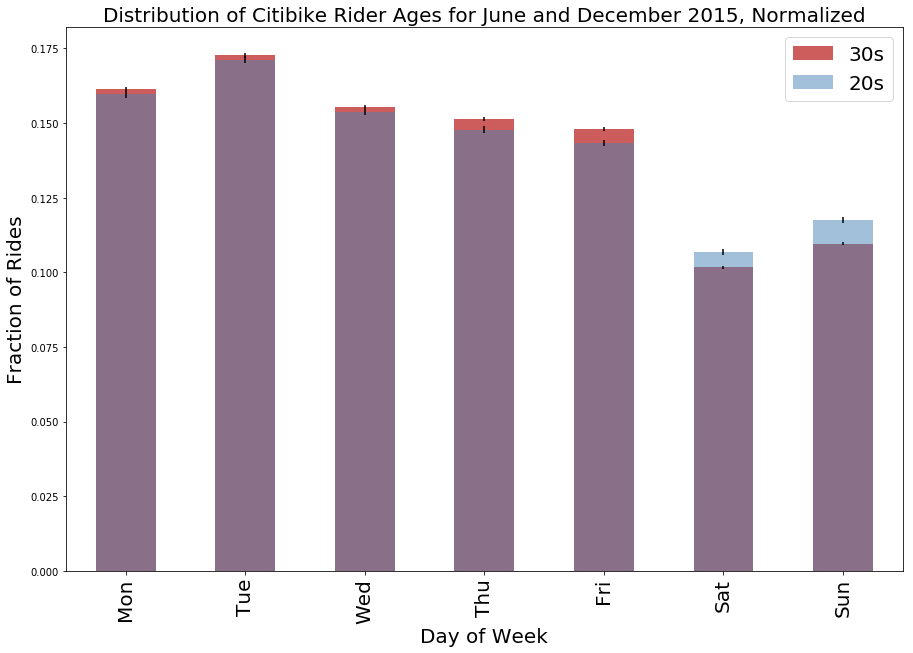

In [138]:
fig = plt.figure(figsize = (15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='30s')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='20s')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_title ("Distribution of Citibike Rider Ages for June and December 2015, Normalized", fontsize=20)
ax.set_ylabel ("Fraction of Rides", fontsize=20)
ax.set_xlabel ("Day of Week", fontsize=20)

plt.legend(['30s','20s'],fontsize=20)

## Figure 2: Distribution of CitiBike rider ages (20s or 30s) for June and December 2015, normalized

# HW8: Statistical Testing

## IDEA: 
## People in their 30s are less likely than people in their 20s to use CitiBike for commuting

## NULL HYPOTHESIS: 
## The proportion of people in their 20s biking on weekends is _the same or higher_ than the proportion of people in their 30s biking on weekends 

# $H_0$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} <= \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}}$
# $H_1$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} > \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}}$

or identically:

# $H_0$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} - \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}} <= 0 $
# $H_1$ : $\frac{30s_{\mathrm{weekend}}}{30s_{\mathrm{total}}} - \frac{20s_{\mathrm{weekend}}}{20s_{\mathrm{total}}} > 0$

## I will use a significance level $\alpha=0.05$

### This means that I want the probability of getting a result to be at least as significant as mine to be less than 5%. 

In [64]:
#cb_df_trunc = cb_df[::100]

In [66]:
#cb_df_trunc.shape

(4588, 3)

In [126]:
# add a day of week column 
cb_df['dow'] = cb_df['date'].dt.weekday
cb_df.head()

birth year                date decade  dow
0      1984.0 2015-06-01 00:00:00    30s    0
1      1981.0 2015-06-01 00:01:00    30s    0
2      1985.0 2015-06-01 00:10:00    30s    0
3      1989.0 2015-06-01 00:11:00    20s    0
4      1983.0 2015-06-01 00:13:00    30s    0

In [127]:
# list unique dow values 
cb_df.dow.unique()

array([0, 1, 2, 3, 4, 5, 6])

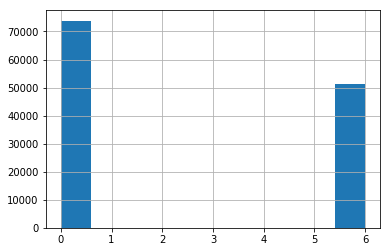

In [128]:
# hist of weekend rides 
cb_df[(cb_df['dow'] == 0) | (cb_df['dow'] == 6)].dow.hist()

In [129]:
cb_df['wkend'] = (cb_df['dow'] == 0) | (cb_df['dow'] == 6)
cb_df.head()

birth year                date decade  dow wkend
0      1984.0 2015-06-01 00:00:00    30s    0  True
1      1981.0 2015-06-01 00:01:00    30s    0  True
2      1985.0 2015-06-01 00:10:00    30s    0  True
3      1989.0 2015-06-01 00:11:00    20s    0  True
4      1983.0 2015-06-01 00:13:00    30s    0  True

In [130]:
# tot30 and tot20 rides
tot30 = len(cb_df[cb_df['decade'] == "30s"])
tot20 = len(cb_df[cb_df['decade'] == "20s"])

# tot30 and tot20 weekend rides
wk30 = len(cb_df[(cb_df['wkend']) & (cb_df['decade'] == "30s")]) 
wk20 = len(cb_df[(cb_df['wkend']) & (cb_df['decade'] == "20s")]) 

# proportions 
prop30 = wk30 / tot30
prop20 = wk20 / tot20

print('The proportion of weekend rides for people in their 30s is %2f.' %prop30)
print('The proportion of weekend rides for people in their 20s is %2f.' %prop20)

The proportion of weekend rides for people in their 30s is 0.271069.
The proportion of weekend rides for people in their 20s is 0.277196.


## use the z-test since this is a test of proportions and I want to see if one proportion is larger than another proportion

In [131]:
# p0 = 30s, p1 = 20s
alpha=0.05

** $H_0: P_0 - P_1 \leq$    0 **
    
** $H_a: P_0 - P_1 $> 0    **

must define the sample standard deviation (standard error)

In [132]:
#define the sample proportion first
sp = (prop30 * tot30 + prop20 * tot20) / (tot30 + tot20)
print(sp)

0.27275778791075617


In [133]:
# one line function to calculate the standard error and p 
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

In [134]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z = zscore(prop20, prop30, se(p(prop30, prop20, tot30, prop20), tot30, prop20))
print(z)

0.00725654476791


<img src="z_table.jpg">

In [135]:
# the z statistic, 0.007, is smaller than the smallest value in the table 
# use 0.5 as a substitute 
p_value = 1 - 0.5

def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_value, alpha)


is the p value 0.50 smaller than the critical value 0.05?
NO!
the Null hypothesis is not rejected


## Since p > alpha, we fail to reject the null hypothesis that the proportion of people in their 20s biking on weekends is the same or higher than the proportion of people in their 30s biking on weekends.

## use the chi-square test for propotions 

## ** H_0: The percentage of weekend rides is not associated with age. ** 

## ** H_1: The percentage of weekend rides is associated with age. ** 
    
## ** $\alpha$ = 0.05    **

fill in the contingency table

|weekend ride    |     yes                | no              |                   
|-----------------------------------------|-----------------|------------|
| 20s            | 0.277 * 126434         | 0.723 * 126434  |   126434   |
| 30s            | 0.271 * 332354         | 0.729 * 332354  |   332354   |
|                |                        |                 |            |
| total          |  125090.152            |   333697.848    |   458788   |

In [140]:
wkday30 = len(cb_df[~(cb_df['wkend']) & (cb_df['decade'] == "30s")]) 
wkday20 = len(cb_df[~(cb_df['wkend']) & (cb_df['decade'] == "20s")])

In [156]:
arr = np.array([[0.277 * 126434, 0.723 * 126434], [0.271 * 332354, 0.729 * 332354]])
tot = 0.277 * 126434 + 0.723 * 126434 + 0.271 * 332354 + 0.729 * 332354

In [168]:
# Define a function to calculate the 2x2 chi-square statistic 
def my2x2ChiSq(values, total):
    chisq = total * ((values[0,0] * values[1,1] - values[0,1] * values[1,0]) ** 2) / ((values[0,0] + values[0,1]) * (values[1,0] + values[1,1]) * (values[0,0] + values[1,0]) * (values[0,1] + values[1,1]))
    return chisq

print("The chi-square value is %2f." %my2x2ChiSq(arr, tot))

The chi-square value is 16.626576.


In [158]:
#DOF = Number of observcations - Number of independent variabels 
dof = 2 - 1 
print("There are %d degree(s) of freedom." %dof) 

There are 1 degree(s) of freedom.


<img src="chi_square table.png">

## Chi-square = 16.6. Our chi-square value is larger than 3.84. We take the value 3.84 from the Chi-Square Distribution table because we have 1 degree of freedom and our significance level is alpha = 0.05. Since 16.6 > 3.84, p < 0.05 and we reject the null hypothesis.